#Fully Connected Autoencoder

* Input  784-latent dimension of your choice - Output 784
* Just one hidden layer
* Sigmoid function after Output layer.
* Building this is just like MLP
* What is the effect of decreasing the size of latent dimension ?


#Download the dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.nn.functional as F


import torch.optim as optim
import numpy as np

from tqdm.autonotebook import tqdm
from itertools import chain

batch_size = 256
image_dim=784


# dataset construction
transform = transforms.Compose([
    transforms.ToTensor(), # convert to tensor
    transforms.Lambda(lambda x: x.view(image_dim)) # flatten into vector
    ])

train_set = torchvision.datasets.MNIST(
    root='./data/MNIST'
    ,train=True
    ,download=True
    ,transform=transform
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

<ipython-input-1-f8903818982a>:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


100%|██████████| 9912422/9912422 [00:00<00:00, 122090826.52it/s]


Extracting ./data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 81903782.17it/s]


Extracting ./data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 45863173.58it/s]

Extracting ./data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15955216.72it/s]


Extracting ./data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/MNIST/raw



#Define the Fully Connected Autoencoder model

In [2]:
class Autoencoder(nn.Module):  #output size =  input size
  def __init__(self,image_dim,latent_dim):
    super(Autoencoder,self).__init__()
    self.layer_encode = nn.Linear(image_dim,latent_dim)
    self.layer_decode = nn.Linear(latent_dim,image_dim)

  def forward(self,x):

    encode = self.layer_encode(x)
    decode = self.layer_decode(encode)
    decode = torch.sigmoid(decode)

    return decode

#Training 

In [4]:
def trainingAutoencoder(data_loader,model,epochSize):
  
  model.train()  
  optimizer = optim.Adam(model.parameters(), lr=1e-3)

  # training loop
  for epoch in range(epochSize):
      losses = []
      trainloader = tqdm(data_loader)

      for i, data in enumerate(trainloader, 0):

          inputs, _ = data

          optimizer.zero_grad()

          outputs =  model(inputs)

          loss = F.binary_cross_entropy(outputs, inputs, reduction='sum') / inputs.shape[0]
          loss.backward()
          optimizer.step()

          losses.append(loss.item())
          trainloader.set_postfix(loss=np.mean(losses), epoch=epoch)
  
  return outputs
    
model =  Autoencoder(784,8)    
decoded_output = trainingAutoencoder(train_loader,model,10)

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

  0%|          | 0/235 [00:00<?, ?it/s]

#Original image

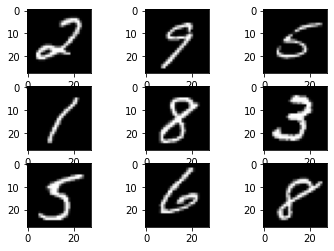

In [ ]:
#Your code here. Sample of original image given above

#Reconstructed image

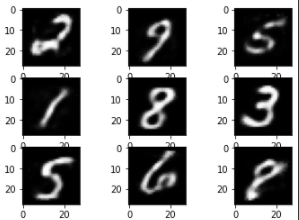

In [ ]:
#Your code here . Sample of reconstruced images for latent dimention=32 given above

#Task: Compare the reconstruced images for latent dimension of 32,16 and 8.

#Evaluate model on training set?